# Zero division error

In [1]:
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
%matplotlib inline

In [2]:
from hals import NMF

Parameters
--------------

In [3]:
max_iter = 100

In [4]:
trial = 1000

In [5]:
l1term = (0.0, 0.0)

In [6]:
m, n = 100, 80
dim = 3

Simulation
-------------

In [7]:
density = []
err_cnt = []

In [8]:
density0 = 0.3
err_cnt0 = 0

for seed in range(trial):
    X = sparse.rand(m, n, density=density0, random_state=seed).toarray()
    if np.min(np.sum(X, axis=0)) < sys.float_info.epsilon:
        continue
    if np.min(np.sum(X, axis=1)) < sys.float_info.epsilon:
        continue
    try:
        original = NMF(n_components=dim, max_iter=max_iter, init='random', calc_obj=False, calc_pgrad=False, stopkkt_flag=False, eps=0.0, normal_flag=False, random_state=seed).fit(X)
        
    except:
        err_cnt0 += 1

density.append(density0)
err_cnt.append(err_cnt0)

In [9]:
density1 = 0.2
err_cnt1 = 0

for seed in range(trial):
    X = sparse.rand(m, n, density=density1, random_state=seed).toarray()
    if np.min(np.sum(X, axis=0)) < sys.float_info.epsilon:
        continue
    if np.min(np.sum(X, axis=1)) < sys.float_info.epsilon:
        continue
    try:
        original = NMF(n_components=dim, max_iter=max_iter, init='random', calc_obj=False, calc_pgrad=False, stopkkt_flag=False, eps=0.0, normal_flag=False, random_state=seed).fit(X)
        
    except:
        err_cnt1 += 1
    
density.append(density1)
err_cnt.append(err_cnt1)

In [10]:
density2 = 0.1
err_cnt2 = 0

for seed in range(trial):
    X = sparse.rand(m, n, density=density2, random_state=seed).toarray()
    if np.min(np.sum(X, axis=0)) < sys.float_info.epsilon:
        continue
    if np.min(np.sum(X, axis=1)) < sys.float_info.epsilon:
        continue
    try:
        original = NMF(n_components=dim, max_iter=max_iter, init='random', calc_obj=False, calc_pgrad=False, stopkkt_flag=False, eps=0.0, normal_flag=False, random_state=seed).fit(X)
        
    except:
        err_cnt2 += 1
    
density.append(density2)
err_cnt.append(err_cnt2)

Result
---------

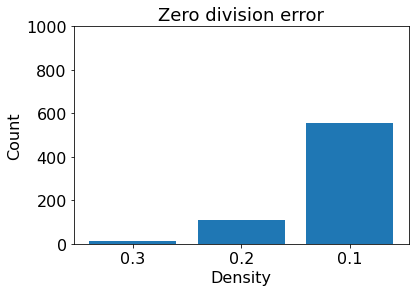

In [11]:
x = list(map(str, density))
plt.bar(x, err_cnt)
plt.ylim(0, trial)
plt.xlabel('Density', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Zero division error', fontsize=18)
plt.tick_params(labelsize=16)
plt.show()